## Loading dataset and importing liabrary 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_theme()

In [3]:
df = pd.read_csv("Q1.csv")

## EDA

In [4]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [5]:
df.shape

(50, 1)

In [6]:
df.isnull().sum()

exam_score    0
dtype: int64

In [8]:
df.dtypes

exam_score    float64
dtype: object

In [9]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


## Eplain describe
1. Count: Their are 50 counts which means there are 50 observations in the Q1 dataset. 
2. Mean: This is the avearge score of the 50 sample students the Dublin secondary school. 
3. Standard deviation: It discribes how close or far away are the obsevations from the mean, the student scores have a small std this result suggest their data are thightly close to the mean.
4. Min: This is the minimum score from the 50 students exam scores.
5. 25%
6. 50%
7. 75%
8. Max: This is the maximum score from the 50 students exam scores.

1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students 
   from a Dublin secondary school. 
2. Find and comment on important summary statistics and produce an appropriate plot to 
   summarise the dataset. 
3. One of the teachers is concerned about the performance of the students in the school. She 
   suspects that their performance may be below the reported national average of 70%. Does 
   the data show that her concerns are justified? Use a significance level of alpha = 0.05. 
4. Produce and comment on an appropriate plot to illustrate your findings. 

## Use function to get the other number summary

## Box plot

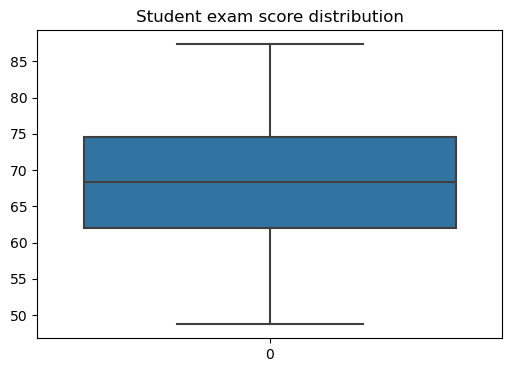

In [18]:
plt.figure(figsize=(6,4)) # Setting the plot size
sns.boxplot(data= df['exam_score'])
plt.title("Student exam score distribution")
plt.show()

C:\Users\timay\AppData\Local\Temp\ipykernel_49804\3570274249.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["exam_score"], kde= True)


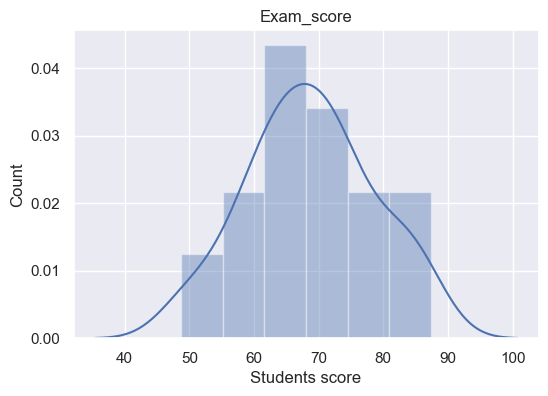

In [50]:
plt.figure(figsize=(6,4))
sns.distplot(df["exam_score"], kde= True)
plt.xlabel("Students score")
plt.ylabel("Count")
plt.title("Exam_score")
plt.show()

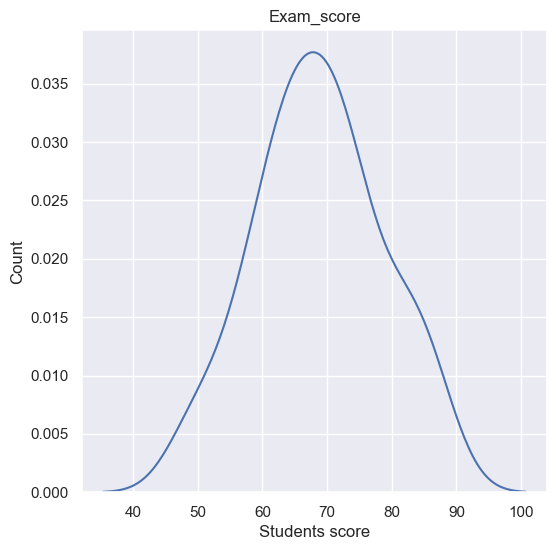

In [49]:
plt.figure(figsize=(6,6))
sns.kdeplot(df["exam_score"])
plt.xlabel("Students score")
plt.ylabel("Count")
plt.title("Exam_score")
plt.show()

## Question 1b
 One of the teachers is concerned about the performance of the students in the school. She 
suspects that their performance may be below the reported national average of 70%. Does 
the data show that her concerns are justified? Use a significance level of alpha = 0.05.

### Parameters:
1. Sample size(n)= 50
2. sample Mean: 68.735600
3. Standard deviation: 9.750143
4. Null-Hypotesis(H0): >= 70%
5. Alternate-Hypothesis(Ha): < 70%
6. alpha = 0.05

###### Hypotesis question: 
Do we have enough evidence to support the teachers H0 the some students score less than 70%?

## Answer rationeal:
#### Tail test?
This is a Left tail test because we are trying to determin if the sudents average is below the national average of 70%. i.e the alternate hypotesis is less than the null-hypotesis.
#### Type of test method: 
Given the sample size is 50 and we have a known sample standard deviation, we are goin to use the Z-test.   
#### Formular:
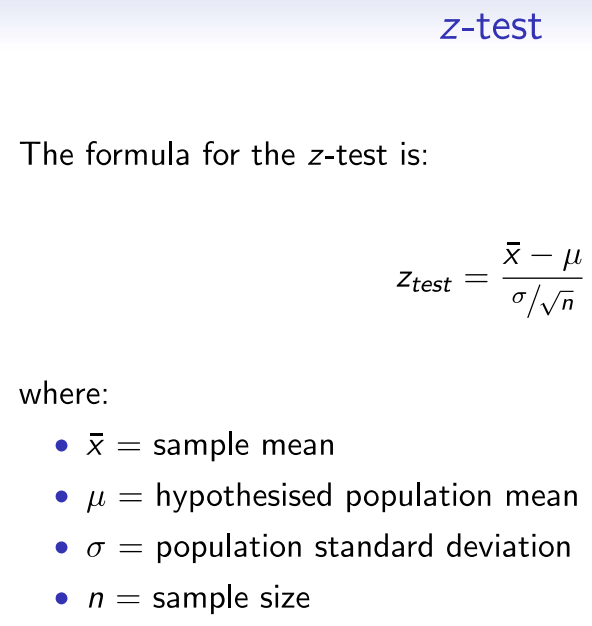

In [58]:
from scipy import stats
import math as mt

In [63]:
# Define parameters for the test (population mean and standard deviation)
population_mean = 70 # Replace this with the expected population mean
#sample = data
sample_mean = 68.735600
sample_std = 9.750143

# Number of observations in the sample
n = 50

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (sample_std / mt.sqrt(n))
#(xbar-mu)/(s/math.sqrt(n)))

# Calculate the p-value
p_value = stats.norm.cdf(z_score)  # confirm if this is correct
# Print Z-score and p-value
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

Z-score: -0.9169771295992962
P-value: 0.17957731233511137


# Conclusion:

At 95% confidence interval, and 0.05 alpha, we fail to reject the null hypothesis. This is becasuse the value of p-value(***write p vlue***) is not less than the alpha value (0.05). 

This in conclusion suggests that we have not foul enough evidence to substantiate the teaches clain of a less national average score for the student exam result. This howeve does not validat or confirmn that the student actually average above or at least the meanimum national average. 

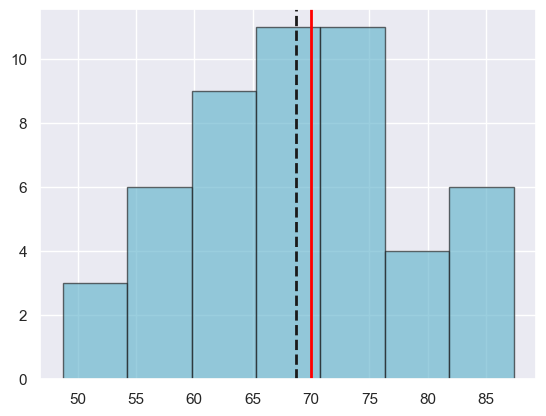

In [67]:
result = plt.hist(df, bins=7, color = "c", edgecolor = "k", alpha =0.65) # parameters for thr histograme
# add inthe popmean and mu to see how far off thr mean is the predicted value is 
plt.axvline(sample_mean, color = "k", linestyle ="dashed", linewidth = 2)
plt.axvline(population_mean, color="red",linestyle ="solid", linewidth = 2)

The read line indicate wehre thr nation average is and the broken line represent he studet average. Contrary to what our test suggest but thsi evedent is not substantial enough to reject null hypothesis. It is how ever visually clear that null hypotheses is not accurate either.

In [64]:
stats.ttest_1samp(df, popmean=70)
# chech if this is correct 

TtestResult(statistic=array([-0.91697714]), pvalue=array([0.36364597]), df=array([49]))

In [65]:
# Wrong!!



# Given data
sample_mean = 68.7356
population_mean = 70  # Reported national average
sample_std = 9.750143
n = 50
alpha = 0.05

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp([sample_mean]*n, population_mean)

# Determine if concerns are justified
if p_value < alpha and t_statistic < 0:
    print("The data suggests that the performance might be significantly below the reported national average.")
    print("The concerns may be justified.")
else:
    print("There isn't sufficient evidence to conclude that the performance is significantly below the reported national average.")
    print("The concerns might not be justified.")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

The data suggests that the performance might be significantly below the reported national average.
The concerns may be justified.
Z-score: -0.9169771295992962
P-value: 0.0


# Qestion 2: 
Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the 
diamond, with categories from “D” to “J”. Colourless diamonds are considered better than 
diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds 
from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).
a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows 
with colourless diamonds and 0 otherwise.
b. Perform an appropriate hypothesis test to determine whether there is any association 
between the clarity of a diamond and whether it is colourless or not. Use a significance 
level of alpha = 0.01.
c. Produce and comment on an appropriate plot to illustrate your findings. 
d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds 
and the mean price of non-colourless diamonds.